In [9]:
import numpy as np
from sldata import SessionData
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mouse_id = "7003"
experiment = "clickbait-motivate"
exp_prefix = "m"
num_sessions = 7
cy_f1_dists = [[] for x in range(num_sessions)]
cy_f0_dists = [[] for x in range(num_sessions)]
cy_diffs = []

for ii in range(0, num_sessions):
    session_id = f"{exp_prefix}{ii}"

    # print("=== Testing SessionData Class ===")
    print(f"Loading data for {mouse_id}_{session_id}...")

    data = SessionData(
        mouse_id=mouse_id,
        session_id=session_id,
        experiment=experiment,
        min_spikes=50,
        verbose=False)

    flip_1_df = data.events[data.events['flip_state'] == True] 
    flip_1_df = flip_1_df[flip_1_df['drinking'] == False]
    flip_1_df = flip_1_df[flip_1_df['reward_state'] == False]
    flip_0_df = data.events[data.events['flip_state'] == False] 
    flip_0_df = flip_0_df[flip_0_df['drinking'] == False]
    flip_0_df = flip_0_df[flip_0_df['reward_state'] == False]

    # print(f"f0/f1 frames: {len(flip_1_df)}/{len(flip_0_df)}")
    # print(f"f0/f1 median: {np.median(flip_0_df['centroid_y'])}/{np.median(flip_1_df['centroid_y'])}")
    # cy_diffs.append(np.median(flip_1_df['centroid_y']) - np.median(flip_0_df['centroid_y']))
    cy_f1_dists[ii] = np.array(flip_1_df['nose.x'])
    cy_f0_dists[ii] = np.array(flip_0_df['nose.x'])

Loading data for 7003_m0...
Found 1 7003_m0.avi files
Loading data for 7003_m1...
Found 1 7003_m1.avi files
Loading data for 7003_m2...
Found 1 7003_m2.avi files
Loading data for 7003_m3...
Found 1 7003_m3.avi files
Loading data for 7003_m4...
Found 1 7003_m4.avi files
Loading data for 7003_m5...
Found 1 7003_m5.avi files
Loading data for 7003_m6...
Found 1 7003_m6.avi files


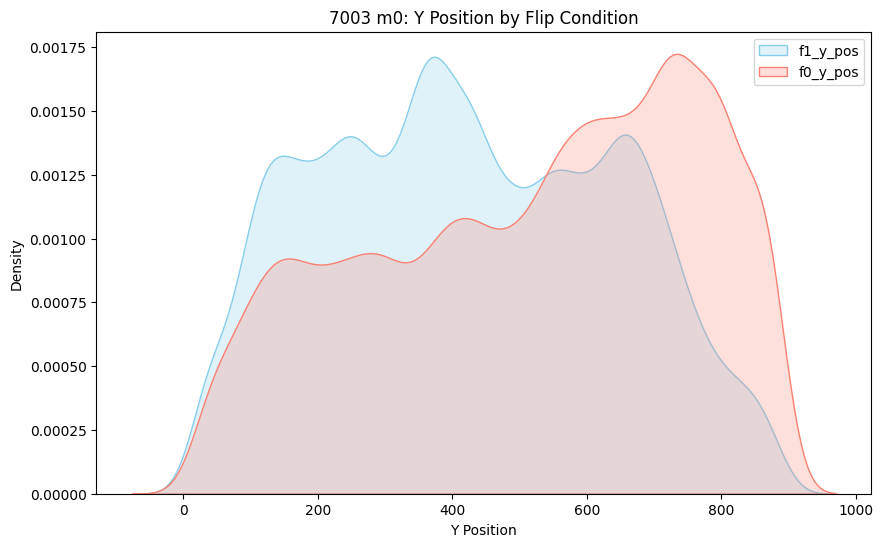

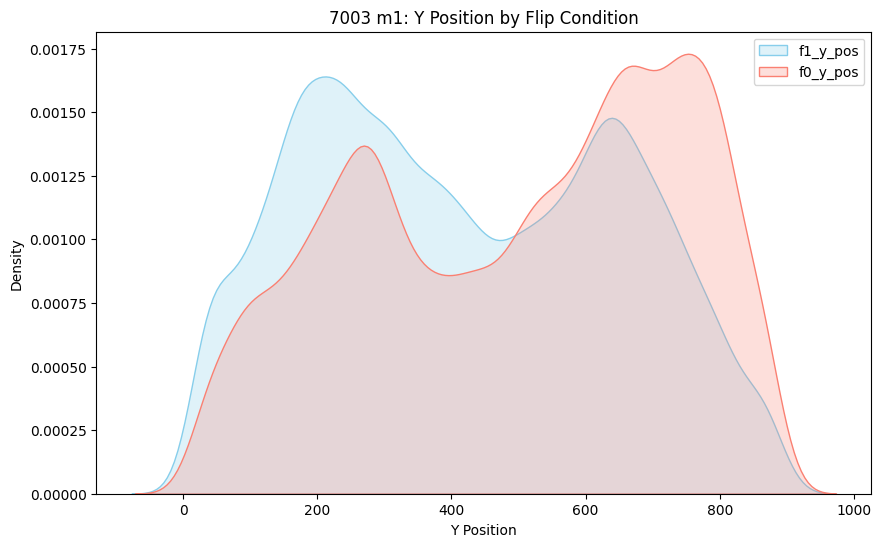

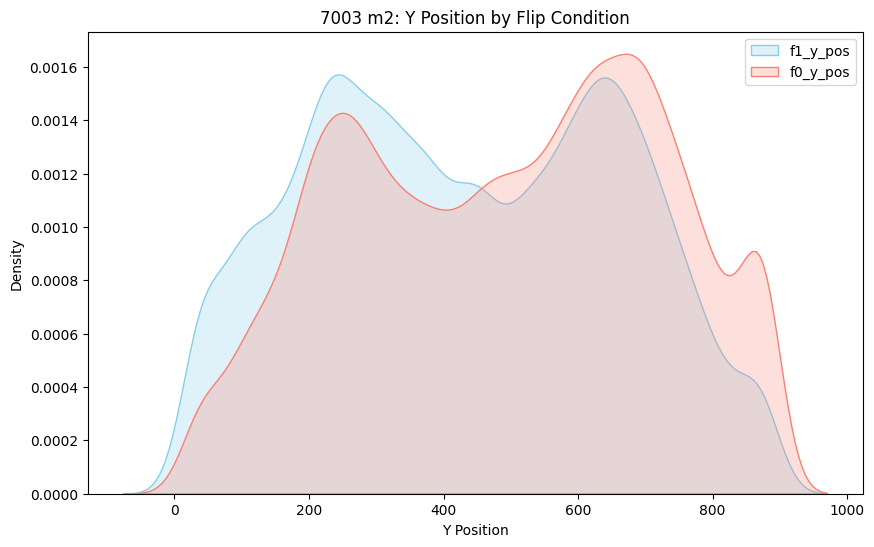

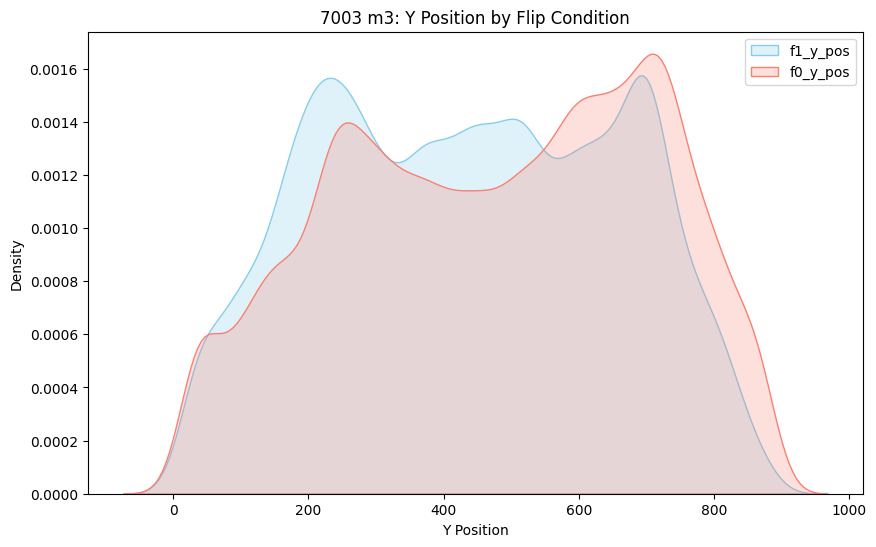

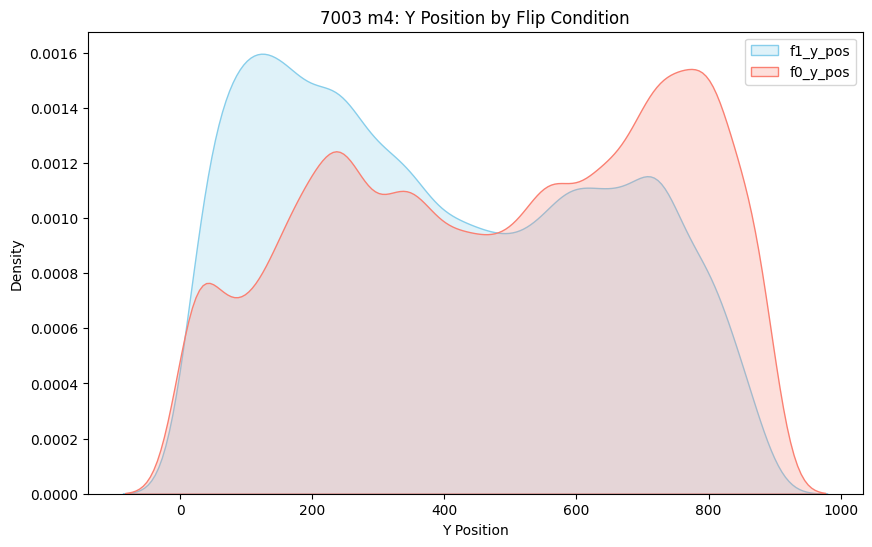

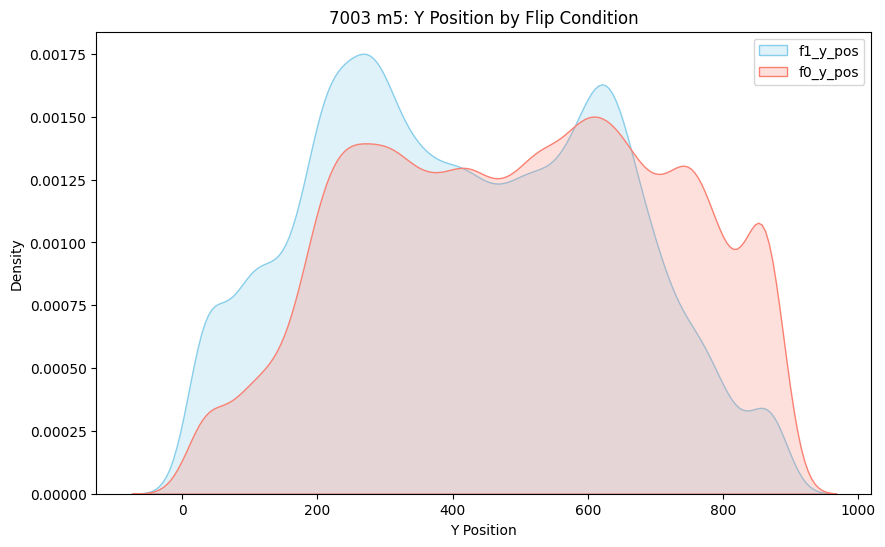

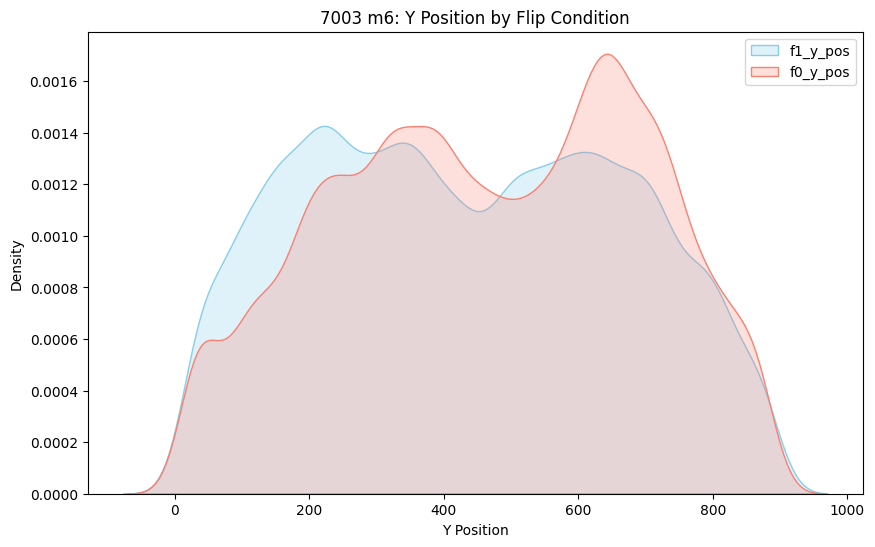

In [11]:
for ii in range(num_sessions):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(cy_f1_dists[ii], label='f1_y_pos', color='skyblue', fill=True, alpha=0.26)
    sns.kdeplot(cy_f0_dists[ii], label='f0_y_pos', color='salmon', fill=True, alpha=0.25)
    plt.title(f"{mouse_id} m{ii}: Y Position by Flip Condition")
    plt.xlabel('Y Position')
    plt.ylabel('Density')
    ax.legend()
    plt.show()